In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel ('train_working.xlsx')
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [101]:
df.shape

(233154, 41)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UNIQUEID                             233154 non-null  int64         
 1   DISBURSED_AMOUNT                     233154 non-null  int64         
 2   ASSET_COST                           233154 non-null  int64         
 3   LTV                                  233154 non-null  float64       
 4   BRANCH_ID                            233154 non-null  int64         
 5   SUPPLIER_ID                          233154 non-null  int64         
 6   MANUFACTURER_ID                      233154 non-null  int64         
 7   CURRENT_PINCODE_ID                   233154 non-null  int64         
 8   DATE_OF_BIRTH                        233154 non-null  datetime64[ns]
 9   EMPLOYMENT_TYPE                      225493 non-null  object        
 

In [5]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')

In [3]:
df['NO_OF_ACCOUNTS'] = df['PRI_NO_OF_ACCTS'] + df['SEC_NO_OF_ACCTS']
df['ACTIVE ACCOUNTS'] = df['PRI_ACTIVE_ACCTS'] + df['SEC_ACTIVE_ACCTS']
df['OVERDUE_ACCOUNTS'] = df['PRI_OVERDUE_ACCTS'] + df['SEC_OVERDUE_ACCTS']
df['CURRENT_BALANCE'] = df['PRI_CURRENT_BALANCE'] + df['SEC_CURRENT_BALANCE']
df['SANCTIONED_AMOUNT'] = df['PRI_SANCTIONED_AMOUNT'] + df['SEC_SANCTIONED_AMOUNT']
df['DISBURSED_AMOUNT'] = df['PRI_DISBURSED_AMOUNT'] + df['SEC_DISBURSED_AMOUNT']
df['INSTALL_AMOUNT'] = df['PRIMARY_INSTAL_AMT'] + df['SEC_INSTAL_AMT']

In [4]:
df.drop(['PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT'], axis=1, inplace=True)

In [105]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT',
       'NO_OF_ACCOUNTS', 'ACTIVE ACCOUNTS', 'OVERDUE_ACCOUNTS',
       'CURRENT_BALANCE', 'SANCTIONED_AMOUNT', 'INSTALL_AMOUNT'],
      dtype='object')

In [5]:
 df[['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0yrs 0mon,0yrs 0mon
1,1yrs 11mon,1yrs 11mon
2,0yrs 0mon,0yrs 0mon
3,0yrs 8mon,1yrs 3mon
4,0yrs 0mon,0yrs 0mon


In [6]:
import re
def to_yrs(s):
    nos = re.findall(r'(\d+)', string=s)
    yr = int(nos[0])
    mo = int(nos[1])
    return (yr * 12) + mo

In [7]:
df['AVERAGE_ACCT_AGE'] = df['AVERAGE_ACCT_AGE'].apply(lambda x: to_yrs(x))
df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].apply(lambda x: to_yrs(x))

In [8]:
 df[['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0,0
1,23,23
2,0,0
3,8,15
4,0,0


In [9]:
df.isnull().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
NEW_ACCTS_IN_LAST_SIX_MONTHS              0
DELINQUENT_ACCTS_IN_LAST_SIX_MON

In [10]:
df['EMPLOYMENT_TYPE'].head()

0         Salaried
1    Self employed
2    Self employed
3    Self employed
4    Self employed
Name: EMPLOYMENT_TYPE, dtype: object

In [11]:
df['EMPLOYMENT_TYPE'].value_counts()

Self employed    127635
Salaried          97858
Name: EMPLOYMENT_TYPE, dtype: int64

In [12]:
df['EMPLOYMENT_TYPE'].value_counts(1)*100

Self employed    56.602644
Salaried         43.397356
Name: EMPLOYMENT_TYPE, dtype: float64

In [13]:
df['EMPLOYMENT_TYPE'].fillna('Not Known', inplace = True)

In [14]:
df['EMPLOYMENT_TYPE'].value_counts(1)*100

Self employed    54.742788
Salaried         41.971401
Not Known         3.285811
Name: EMPLOYMENT_TYPE, dtype: float64

In [15]:
df[[ 'DATE_OF_BIRTH','DISBURSAL_DATE']].head()

,DATE_OF_BIRTH,DISBURSAL_DATE
0,1984-01-01,2018-08-03
1,1985-07-31,2018-09-26
2,1985-08-24,2018-08-01
3,1993-12-30,2018-10-26
4,1977-12-09,2018-09-26


In [16]:
now = pd.to_datetime('now')
df['AGE']=(now.year - df['DATE_OF_BIRTH'].dt.year)
df['LOAN_AGE']=(now.year - df['DISBURSAL_DATE'].dt.year)

In [17]:
df['LOAN_AGE'].describe()

count    233154.0
mean          3.0
std           0.0
min           3.0
25%           3.0
50%           3.0
75%           3.0
max           3.0
Name: LOAN_AGE, dtype: float64

In [18]:
df['AGE'].describe()

count    233154.000000
mean         37.100946
std           9.805992
min          21.000000
25%          29.000000
50%          35.000000
75%          44.000000
max          72.000000
Name: AGE, dtype: float64

In [19]:
df = df.drop(['DATE_OF_BIRTH','DISBURSAL_DATE'], axis=1)

In [20]:
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,STATE_ID,...,NO_OF_INQUIRIES,LOAN_DEFAULT,NO_OF_ACCOUNTS,ACTIVE ACCOUNTS,OVERDUE_ACCOUNTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,INSTALL_AMOUNT,AGE,LOAN_AGE
0,420825,0,58400,89.55,67,22807,45,1441,Salaried,6,...,0,0,0,0,0,0,0,0,37,3
1,537409,50200,65550,73.23,67,22807,45,1502,Self employed,6,...,0,1,1,1,1,27600,50200,1991,36,3
2,417566,0,61360,89.63,67,22807,45,1497,Self employed,6,...,0,0,0,0,0,0,0,0,36,3
3,624493,0,66113,88.48,67,22807,45,1501,Self employed,6,...,1,1,3,0,0,0,0,31,28,3
4,539055,0,60300,88.39,67,22807,45,1495,Self employed,6,...,1,1,0,0,0,0,0,0,44,3


In [21]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'NO_OF_ACCOUNTS', 'ACTIVE ACCOUNTS', 'OVERDUE_ACCOUNTS',
       'CURRENT_BALANCE', 'SANCTIONED_AMOUNT', 'INSTALL_AMOUNT', 'AGE',
       'LOAN_AGE'],
      dtype='object')

In [22]:
df.dtypes

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
EMPLOYMENT_TYPE                         object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
NEW_ACCTS_IN_LAST_SIX_MONTHS             int64
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS      int64
AVERAGE_ACCT_

In [23]:
df['SUPPLIER_ID']= df['SUPPLIER_ID'].astype(object)
df['UNIQUEID']= df['UNIQUEID'].astype(object)
df['BRANCH_ID']= df['BRANCH_ID'].astype(object)
df['MANUFACTURER_ID']= df['MANUFACTURER_ID'].astype(object)
df['CURRENT_PINCODE_ID']= df['CURRENT_PINCODE_ID'].astype(object)
df['STATE_ID']= df['STATE_ID'].astype(object)
df['EMPLOYEE_CODE_ID']= df['EMPLOYEE_CODE_ID'].astype(object)
df['MOBILENO_AVL_FLAG']= df['MOBILENO_AVL_FLAG'].astype(object)
df['AADHAR_FLAG']= df['AADHAR_FLAG'].astype(object)
df['PAN_FLAG']= df['PAN_FLAG'].astype(object)
df['VOTERID_FLAG']= df['VOTERID_FLAG'].astype(object)
df['DRIVING_FLAG']= df['DRIVING_FLAG'].astype(object)
df['PASSPORT_FLAG']= df['PASSPORT_FLAG'].astype(object)
df['NEW_ACCTS_IN_LAST_SIX_MONTHS']= df['NEW_ACCTS_IN_LAST_SIX_MONTHS'].astype(object)
df['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS']= df['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'].astype(object)
df['NO_OF_INQUIRIES']= df['NO_OF_INQUIRIES'].astype(object)
df['NO_OF_ACCOUNTS']= df['NO_OF_ACCOUNTS'].astype(object)
df['ACTIVE ACCOUNTS']= df['ACTIVE ACCOUNTS'].astype(object)
df['OVERDUE_ACCOUNTS']= df['OVERDUE_ACCOUNTS'].astype(object)
df['LOAN_DEFAULT']= df['LOAN_DEFAULT'].astype(object)

In [24]:
df.dtypes

UNIQUEID                                object
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                               object
SUPPLIER_ID                             object
MANUFACTURER_ID                         object
CURRENT_PINCODE_ID                      object
EMPLOYMENT_TYPE                         object
STATE_ID                                object
EMPLOYEE_CODE_ID                        object
MOBILENO_AVL_FLAG                       object
AADHAR_FLAG                             object
PAN_FLAG                                object
VOTERID_FLAG                            object
DRIVING_FLAG                            object
PASSPORT_FLAG                           object
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
NEW_ACCTS_IN_LAST_SIX_MONTHS            object
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS     object
AVERAGE_ACCT_

In [123]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'NO_OF_ACCOUNTS', 'ACTIVE ACCOUNTS', 'OVERDUE_ACCOUNTS',
       'CURRENT_BALANCE', 'SANCTIONED_AMOUNT', 'INSTALL_AMOUNT', 'AGE',
       'LOAN_AGE'],
      dtype='object')

In [25]:
dfn = df.select_dtypes(include = np.number)
dfn.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'CURRENT_BALANCE',
       'SANCTIONED_AMOUNT', 'INSTALL_AMOUNT', 'AGE', 'LOAN_AGE'],
      dtype='object')

In [26]:
df_cat = df.select_dtypes(include = object)
df_cat.columns

Index(['UNIQUEID', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID',
       'CURRENT_PINCODE_ID', 'EMPLOYMENT_TYPE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'NO_OF_ACCOUNTS', 'ACTIVE ACCOUNTS',
       'OVERDUE_ACCOUNTS'],
      dtype='object')

In [27]:
df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

In [28]:
df['LOAN_DEFAULT'].value_counts(1)*100

0    78.292888
1    21.707112
Name: LOAN_DEFAULT, dtype: float64

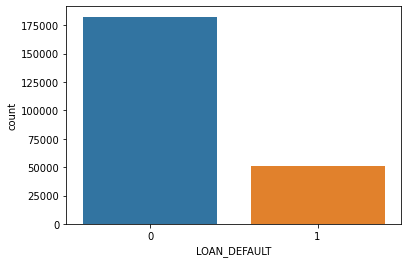

In [29]:
sns.countplot(df['LOAN_DEFAULT'])
plt.show()